In [6]:
import pandas as pd
import seaborn as sns   
import time as tm
import numpy as np
import matplotlib.pyplot as plt
import time
import re
from math import pi
import networkx as nx

In [7]:
file2= "C:\\Users\\Usuario\\Documents\\CODIGO\\EVENT_SALUD\\RECURSOS_salud_csv.csv"
recursos_salud = pd.read_csv(file2, sep=";")

#Eliminando datos no deseados
recursos_salud = recursos_salud.dropna(subset=['CA_CONSULTORIOS'])

print(recursos_salud.isnull().sum())

# Diccionario de regiones clasificadas por zonas
zonas_geograficas = {
    "Costa": [
        "TUMBES", "PIURA", "LAMBAYEQUE", "LA LIBERTAD", 
        "ANCASH", "LIMA", "CALLAO", "ICA", "AREQUIPA", "MOQUEGUA", "TACNA"
    ],
    "Sierra": [
        "CAJAMARCA", "AMAZONAS", "HUANUCO", "PASCO", "JUNIN", 
        "HUANCAVELICA", "APURIMAC", "CUSCO", "AYACUCHO", "PUNO", "AREQUIPA"
    ],
    "Selva": [
        "AMAZONAS", "LORETO", "UCAYALI", "SAN MARTIN", 
        "MADRE DE DIOS", "HUÁNUCO", "CUSCO"
    ]
}

# Agregar la columna 'Zona' al dataset según el departamento
def asignar_zona(departamento):
    for zona, departamentos in zonas_geograficas.items():
        if departamento.upper() in departamentos:
            return zona
    return "Otros"

# Aplicar la función al dataset de recursos_salud
recursos_salud["Zona"] = recursos_salud["DEPARTAMENTO"].apply(asignar_zona)

recursos_salud

MES                      0
UBIGEO                   0
DEPARTAMENTO             0
PROVINCIA                0
DISTRITO                 0
SECTOR                   0
CATEGORIA                0
CO_IPRESS                0
RAZON_SOC                0
CA_CONSULTORIOS          0
CA_CONSULTORIOS_FN       0
CA_CAMAS                 0
CA_MEDICOS_TOTAL         0
CA_MEDICOS_SERUM         0
CA_MEDICOS_RESIDENTES    0
CA_ENFERMERAS            0
CA_ODONTOLOGOS           0
CA_PSICOLOGOS            0
CA_NUTRICIONISTAS        0
CA_TECNOLOGOS_MEDICOS    0
CA_OBSTETRICES           0
CA_FARMACEUTICOS         0
CA_AUXILIARES            0
CA_OTROS_PROF            0
CA_AMBULANCIAS           0
dtype: int64


,MES,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,SECTOR,CATEGORIA,CO_IPRESS,RAZON_SOC,CA_CONSULTORIOS,...,CA_ODONTOLOGOS,CA_PSICOLOGOS,CA_NUTRICIONISTAS,CA_TECNOLOGOS_MEDICOS,CA_OBSTETRICES,CA_FARMACEUTICOS,CA_AUXILIARES,CA_OTROS_PROF,CA_AMBULANCIAS,Zona
0,8,40604,AREQUIPA,CONDESUYOS,CHICHAS,GOBIERNO REGIONAL,I-2,1410,PUESTO DE SALUD CHICHAS,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Costa
1,8,40604,AREQUIPA,CONDESUYOS,CHICHAS,GOBIERNO REGIONAL,I-1,1416,YANQUE,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Costa
2,8,40608,AREQUIPA,CONDESUYOS,YANAQUIHUA,GOBIERNO REGIONAL,I-2,1414,PUESTO DE SALUD ISPACAS,5.0,...,1.0,1.0,1.0,0.0,2.0,0.0,3.0,0.0,1.0,Costa
3,8,40602,AREQUIPA,CONDESUYOS,ANDARAY,GOBIERNO REGIONAL,I-2,1415,PUESTO DE SALUD ANDARAY,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,Costa
4,8,40604,AREQUIPA,CONDESUYOS,CHICHAS,GOBIERNO REGIONAL,I-2,1411,PUESTO DE SALUD YACHANGUILLO,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,Costa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46895,12,160101,LORETO,MAYNAS,IQUITOS,SANIDAD DE LA FUERZA AEREA DEL PERU,I-4,10605,HOSPITAL REGIONAL DEL ORIENTE - FAP,11.0,...,3.0,2.0,1.0,1.0,1.0,2.0,21.0,2.0,0.0,Selva
46896,12,140106,LAMBAYEQUE,CHICLAYO,LA VICTORIA,PRIVADO,II-E,10972,HOSPITAL PRIVADO JUAN PABLO II SAC,9.0,...,0.0,0.0,0.0,8.0,0.0,2.0,27.0,1.0,1.0,Costa
46897,12,220605,SAN MARTIN,MARISCAL CACERES,PAJARILLO,GOBIERNO REGIONAL,I-1,6783,SOLEDAD,3.0,...,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,Selva
46898,12,220605,SAN MARTIN,MARISCAL CACERES,PAJARILLO,GOBIERNO REGIONAL,I-1,6563,COSTA RICA,4.0,...,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,1.0,Selva


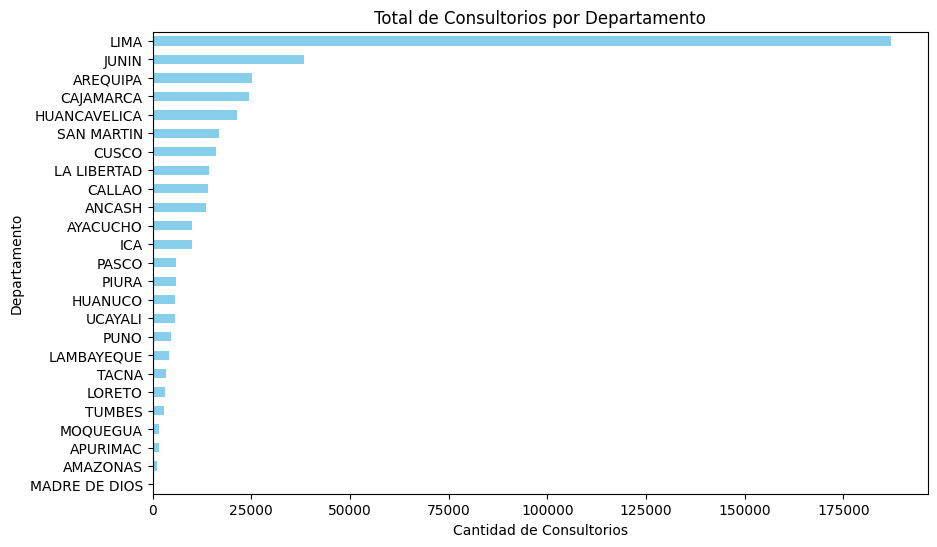

In [8]:
# Total de recursos por departamento
recursos_por_departamento = recursos_salud.groupby("DEPARTAMENTO").sum(numeric_only=True)

# Gráfico de barras para visualizar los recursos
import matplotlib.pyplot as plt
recursos_por_departamento["CA_CONSULTORIOS"].sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Total de Consultorios por Departamento")
plt.xlabel("Cantidad de Consultorios")
plt.ylabel("Departamento")
plt.show()


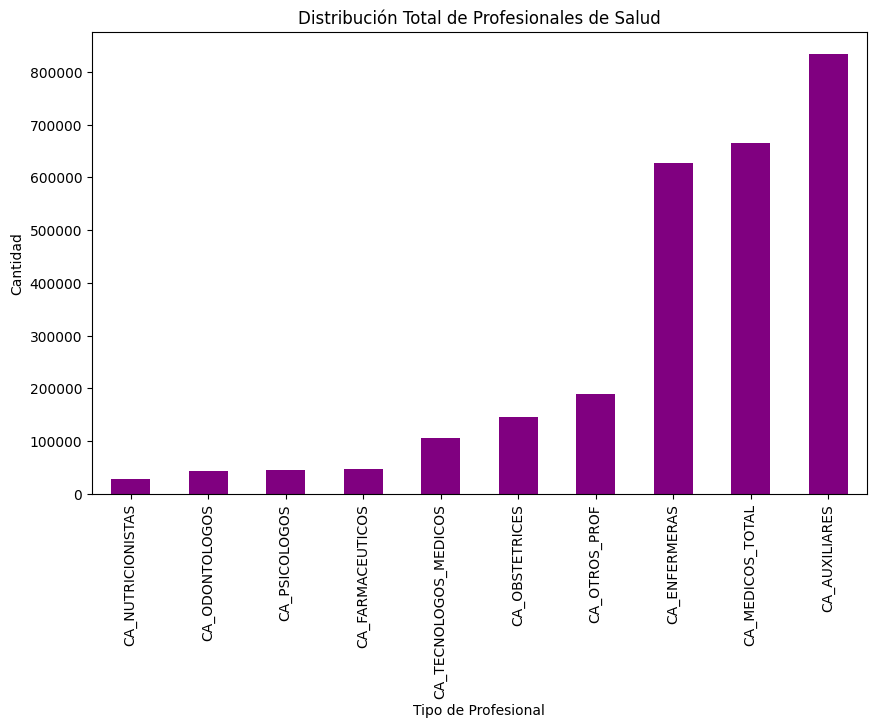

In [9]:
# Suma total por cada tipo de profesional
profesionales_totales = recursos_salud[[
    "CA_MEDICOS_TOTAL", "CA_ENFERMERAS", "CA_ODONTOLOGOS", 
    "CA_PSICOLOGOS", "CA_NUTRICIONISTAS", "CA_TECNOLOGOS_MEDICOS",
    "CA_OBSTETRICES", "CA_FARMACEUTICOS", "CA_AUXILIARES", "CA_OTROS_PROF"
]].sum()

# Gráfico de barras de distribución de profesionales
profesionales_totales.sort_values().plot(kind='bar', figsize=(10, 6), color='purple')
plt.title("Distribución Total de Profesionales de Salud")
plt.xlabel("Tipo de Profesional")
plt.ylabel("Cantidad")
plt.show()


CATEGORIA
0        30.855520
I-1       0.795679
I-2       0.717401
I-3       0.854440
I-4       0.781823
II-1      0.843657
II-2      0.713230
II-E      0.863589
III-1     0.791192
III-2     0.971979
III-E     0.593479
Name: Relacion_Consultorios, dtype: float64


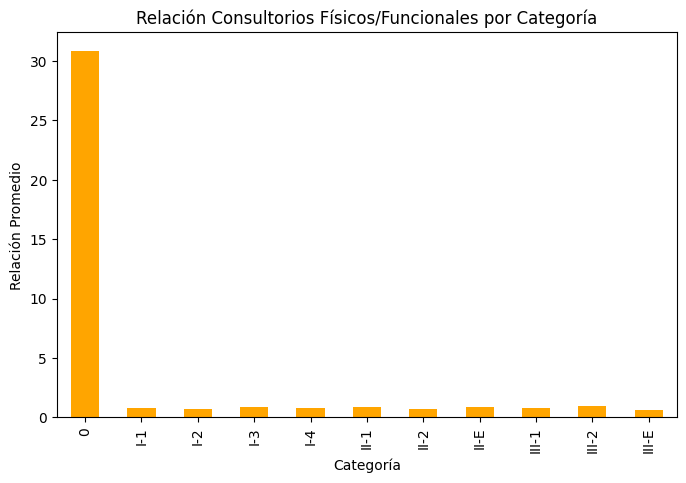

In [10]:
# Relación entre consultorios físicos y funcionales
recursos_salud['Relacion_Consultorios'] = recursos_salud["CA_CONSULTORIOS"] / (recursos_salud["CA_CONSULTORIOS_FN"] + 1)

# Promedio de la relación por categoría
relacion_por_categoria = recursos_salud.groupby("CATEGORIA")["Relacion_Consultorios"].mean()
print(relacion_por_categoria)

# Visualización
relacion_por_categoria.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title("Relación Consultorios Físicos/Funcionales por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Relación Promedio")
plt.show()


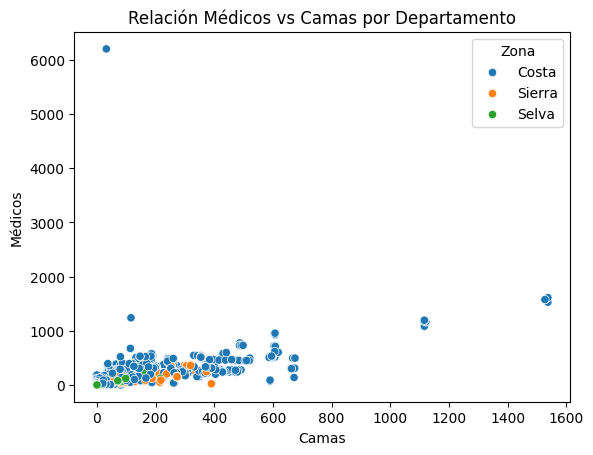

In [11]:
# Relación médicos por camas
recursos_salud["Medicos_por_Cama"] = recursos_salud["CA_MEDICOS_TOTAL"] / (recursos_salud["CA_CAMAS"] + 1)

# Gráfico de dispersión médicos vs camas
import seaborn as sns
sns.scatterplot(data=recursos_salud, x="CA_CAMAS", y="CA_MEDICOS_TOTAL", hue="Zona")
plt.title("Relación Médicos vs Camas por Departamento")
plt.xlabel("Camas")
plt.ylabel("Médicos")
plt.show()


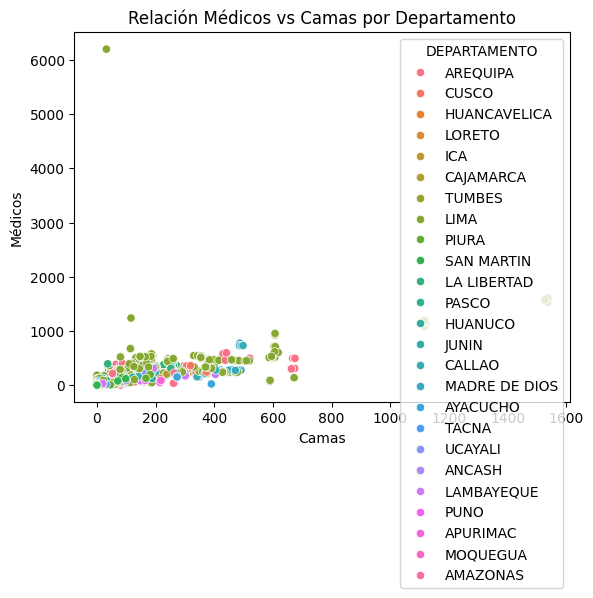

In [12]:
# Relación médicos por camas
recursos_salud["Medicos_por_Cama"] = recursos_salud["CA_MEDICOS_TOTAL"] / (recursos_salud["CA_CAMAS"] + 1)

# Gráfico de dispersión médicos vs camas
import seaborn as sns
sns.scatterplot(data=recursos_salud, x="CA_CAMAS", y="CA_MEDICOS_TOTAL", hue="DEPARTAMENTO")
plt.title("Relación Médicos vs Camas por Departamento")
plt.xlabel("Camas")
plt.ylabel("Médicos")
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1824\899997924.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recursos_salud_lima["Medicos_por_Cama"] = recursos_salud_lima["CA_MEDICOS_TOTAL"] / (recursos_salud_lima["CA_CAMAS"] + 1)


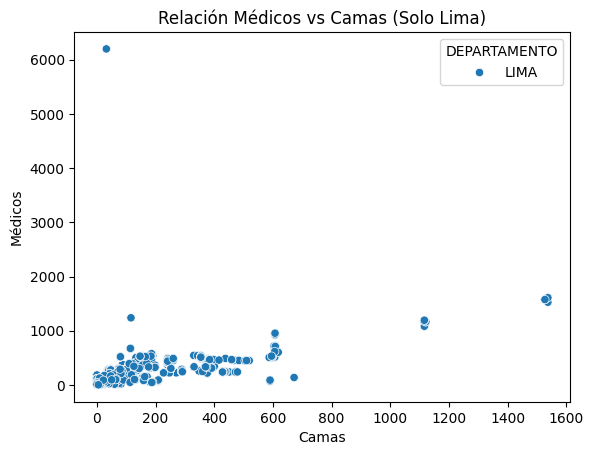

In [16]:
# Filtrar solo el departamento de Lima
recursos_salud_lima = recursos_salud[recursos_salud["DEPARTAMENTO"] == "LIMA"]

# Calcular relación médicos por cama para Lima
recursos_salud_lima["Medicos_por_Cama"] = recursos_salud_lima["CA_MEDICOS_TOTAL"] / (recursos_salud_lima["CA_CAMAS"] + 1)

# Gráfico de dispersión médicos vs camas (solo Lima)
sns.scatterplot(data=recursos_salud_lima, x="CA_CAMAS", y="CA_MEDICOS_TOTAL", hue="DEPARTAMENTO")
plt.title("Relación Médicos vs Camas (Solo Lima)")
plt.xlabel("Camas")
plt.ylabel("Médicos")
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1824\916994752.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recursos_salud_sin_lima["Medicos_por_Cama"] = recursos_salud_sin_lima["CA_MEDICOS_TOTAL"] / (recursos_salud_sin_lima["CA_CAMAS"] + 1)


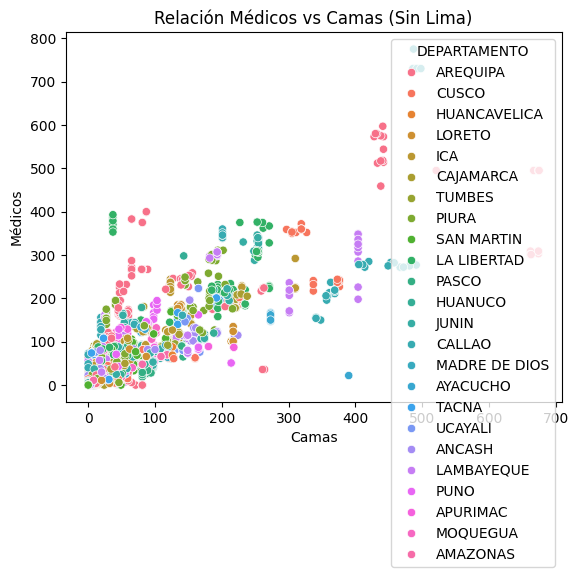

In [17]:
# Filtrar todos los departamentos excepto Lima
recursos_salud_sin_lima = recursos_salud[recursos_salud["DEPARTAMENTO"] != "LIMA"]

# Calcular relación médicos por cama excluyendo Lima
recursos_salud_sin_lima["Medicos_por_Cama"] = recursos_salud_sin_lima["CA_MEDICOS_TOTAL"] / (recursos_salud_sin_lima["CA_CAMAS"] + 1)

# Gráfico de dispersión médicos vs camas (excluyendo Lima)
sns.scatterplot(data=recursos_salud_sin_lima, x="CA_CAMAS", y="CA_MEDICOS_TOTAL", hue="DEPARTAMENTO")
plt.title("Relación Médicos vs Camas (Sin Lima)")
plt.xlabel("Camas")
plt.ylabel("Médicos")
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1824\92327352.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recursos_salud_sin_lima["Medicos_por_Cama"] = recursos_salud_sin_lima["CA_MEDICOS_TOTAL"] / (recursos_salud_sin_lima["CA_CAMAS"] + 1)


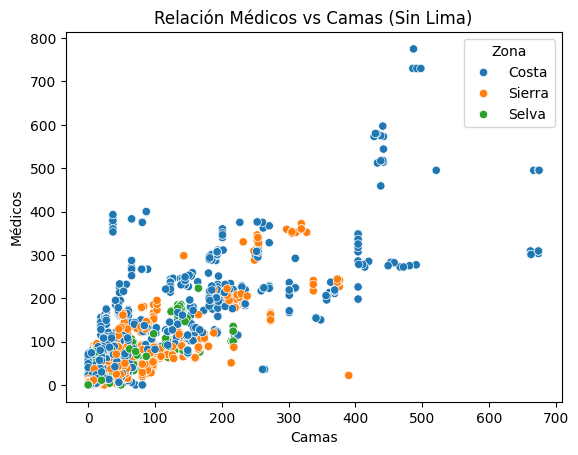

In [18]:
# Filtrar todos los departamentos excepto Lima
recursos_salud_sin_lima = recursos_salud[recursos_salud["DEPARTAMENTO"] != "LIMA"]

# Calcular relación médicos por cama excluyendo Lima
recursos_salud_sin_lima["Medicos_por_Cama"] = recursos_salud_sin_lima["CA_MEDICOS_TOTAL"] / (recursos_salud_sin_lima["CA_CAMAS"] + 1)

# Gráfico de dispersión médicos vs camas (excluyendo Lima)
sns.scatterplot(data=recursos_salud_sin_lima, x="CA_CAMAS", y="CA_MEDICOS_TOTAL", hue="Zona")
plt.title("Relación Médicos vs Camas (Sin Lima)")
plt.xlabel("Camas")
plt.ylabel("Médicos")
plt.show()


In [13]:
# Filtrar IPRESS con menos de 2 médicos y 1 cama
zonas_criticas = recursos_salud[(recursos_salud["CA_MEDICOS_TOTAL"] < 2) & (recursos_salud["CA_CAMAS"] < 1)]

# Total de zonas críticas por departamento
criticas_por_departamento = zonas_criticas["DEPARTAMENTO"].value_counts()
print(criticas_por_departamento)


DEPARTAMENTO
JUNIN            5118
CAJAMARCA        4953
HUANCAVELICA     4475
SAN MARTIN       2688
CUSCO            1903
PASCO            1903
ANCASH           1426
AREQUIPA         1187
AYACUCHO         1000
LA LIBERTAD       846
UCAYALI           702
HUANUCO           536
ICA               372
TUMBES            235
LIMA              129
CALLAO            111
PUNO               69
TACNA              50
MOQUEGUA           38
PIURA              22
LORETO              3
APURIMAC            1
MADRE DE DIOS       1
Name: count, dtype: int64


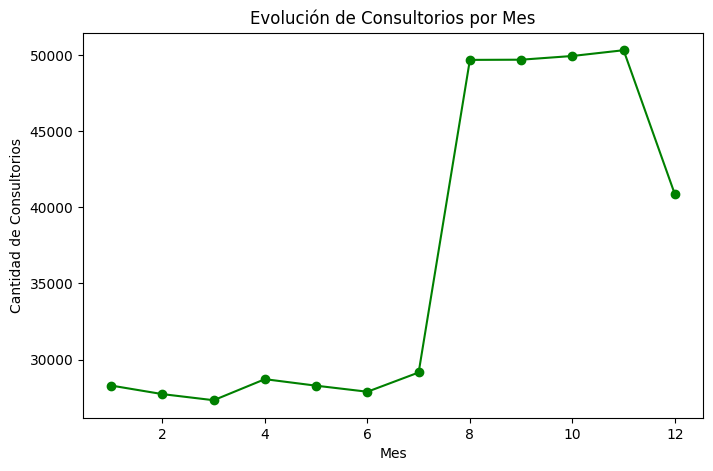

In [14]:
# Sumar recursos por mes
recursos_por_mes = recursos_salud.groupby("MES").sum(numeric_only=True)

# Visualizar la evolución de consultorios por mes
recursos_por_mes["CA_CONSULTORIOS"].plot(kind='line', marker='o', figsize=(8, 5), color='green')
plt.title("Evolución de Consultorios por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Consultorios")
plt.show()


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


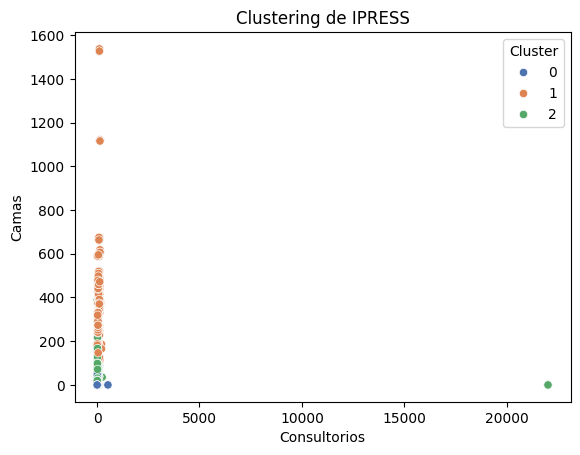

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar columnas relevantes
clustering_data = recursos_salud[[
    "CA_CONSULTORIOS", "CA_CAMAS", "CA_MEDICOS_TOTAL", 
    "CA_ENFERMERAS", "CA_AMBULANCIAS"
]].dropna()

# Escalar los datos
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Modelo de clustering
kmeans = KMeans(n_clusters=3, random_state=42)
recursos_salud["Cluster"] = kmeans.fit_predict(clustering_data_scaled)

# Visualizar los clusters
sns.scatterplot(data=recursos_salud, x="CA_CONSULTORIOS", y="CA_CAMAS", hue="Cluster", palette="deep")
plt.title("Clustering de IPRESS")
plt.xlabel("Consultorios")
plt.ylabel("Camas")
plt.show()
